In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import os
import xlwings as xw


In [5]:
minerals = ["Manganese", "Lithium", "Cobalt", "Nickel"]
data_directory = "./data" # Set this to your own directory


top_reserves_by_mineral = pd.read_csv(os.path.join(data_directory, "ReservesByMineral.csv"))
reserves_totals = top_reserves_by_mineral.groupby('Mineral', as_index=False)["Aggregate Reserves & Resources (tonnes)"].agg('sum')

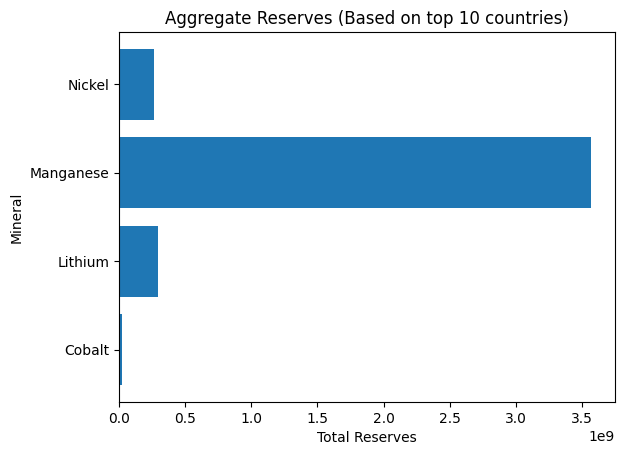

In [6]:
plt.figure()
plt.barh(y = reserves_totals['Mineral'], width = reserves_totals["Aggregate Reserves & Resources (tonnes)"])
plt.title("Aggregate Reserves (Based on top 10 countries)")
plt.xlabel("Total Reserves")
plt.ylabel("Mineral")
plt.show()

In [7]:

combined = None

mining_path = os.path.join(data_directory, "SPGlobal_MetalsAndMiningProperties-Combined-Dec-2024.xlsx")
for i, mineral in enumerate(minerals):
    data = pd.read_excel(mining_path, sheet_name = mineral)
    print(f"Read {mineral}")

    # data.dropna(subset="Primary Reserves and Resources", inplace = True)
    data["Reserves & Resources As Of Date"] = pd.to_datetime(data["Reserves & Resources As Of Date"])
    data["Primary Mineral"] = mineral
    data["Year"] = data["Reserves & Resources As Of Date"].dt.year


    if i == 0:
        combined = data
        continue

    combined = pd.concat([combined, data], ignore_index=True)

combined = combined.sort_values(by = "Year").query("`Activity Status` == 'Active'")
combined["Property ID"] = combined["Property ID"].astype(int)


Read Manganese
Read Lithium
Read Cobalt
Read Nickel


In [8]:
locations = pd.read_excel("data/MiningPropertyLocations.xlsx")
coords = locations[["KeyMineProject","Latitude (degrees)", "Longitude (degrees)"]]

combined = combined.merge(coords, left_on = "Property ID", right_on="KeyMineProject" ,how = "inner")
combined.drop("KeyMineProject", axis=1, inplace=True, errors="ignore")
combined

,Property,Property ID,Owner(s),Country/Region,Country/Region Risk Score & Outlook,Development Stage,Activity Status,Commodity(s),Primary Reserves and Resources,Unit,Total In-Situ Value ($M),Reserves & Resources As Of Date,Primary Mineral,Year,Latitude (degrees),Longitude (degrees)
0,Lithium Two,79958,"New Age Metals Inc., Mineral Resources Ltd.",Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Caesium, Rubidium, Tantalum",7600,tonnes,123.180800,1947-12-31,Lithium,1947,50.61363,-95.46443
1,Falcon West,90157,Grid Metals Corp.,Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Caesium, Tantalum, Rubidium",4000,tonnes,64.832000,1955-12-31,Lithium,1955,49.56729,-95.68944
2,Irgon,79892,QMC Quantum Minerals Corp,Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Tantalum",16420,tonnes,266.135360,1956-12-31,Lithium,1956,50.60720,-95.39696
3,Chrome-Puddy,89842,"Green Bridge Metals Corp., Pavey Ark Minerals...",Canada,1.4 Moderate - No Change,Exploration,Active,"Nickel, Chromium, Copper, Cobalt, Platinum, Ir...",73482,tonnes,1384.357942,1966-12-31,Nickel,1966,49.96907,-89.52303
4,Chrome-Puddy,89842,"Green Bridge Metals Corp., Pavey Ark Minerals...",Canada,1.4 Moderate - No Change,Exploration,Active,"Nickel, Chromium, Copper, Cobalt, Platinum, Ir...",4627,tonnes,1384.357942,1966-12-31,Cobalt,1966,49.96907,-89.52303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Foster,88835,Lunnon Metals Ltd.,Australia,1.4 Moderate - No Change,Prefeas/Scoping,Active,"Nickel, Cobalt, Copper, Gold, Palladium, Plati...",1468,tonnes,2022.845594,2024-06-11,Cobalt,2024,-31.34536,121.74359
582,Selkirk,27655,"Premium Resources Ltd., Botswana",Botswana,1.8 Elevated - No Change,Feasibility,Active,"Nickel, Copper, Cobalt, Platinum, Palladium, Gold",108000,tonnes,3939.211657,2024-11-01,Nickel,2024,-21.29955,27.73351
583,Alexo-Dundonald,33464,Class 1 Nickel & Technologies,Canada,1.4 Moderate - No Change,Reserves Development,Active,"Nickel, Copper, Cobalt, Gold, Platinum, Palladium",1449,tonnes,970.740384,2024-10-01,Cobalt,2024,48.65369,-80.80783
584,Aguablanca,29064,"Denarius Metals Corp., Private Interest",Spain,1.9 Elevated - No Change,Prefeas/Scoping,Active,"Nickel, Copper, Cobalt, Platinum, Palladium, G...",897,tonnes,1036.531600,2024-03-24,Cobalt,2024,37.96111,-6.18528


In [9]:
start_year = 2010
combined = combined[combined["Year"] >= start_year]

In [10]:
from io import StringIO
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error


d = """
Year,Capacity
2010,14
2011,28
2012,38
2013,56
2014,75
2015,85
2016,111
2017,198
2018,293.7
2022,1570
2025,3970
2030,6790
"""

df = pd.read_csv(StringIO(d))
df["log_capacity"] = np.log(df["Capacity"])
df

,Year,Capacity,log_capacity
0,2010,14.0,2.639057
1,2011,28.0,3.332205
2,2012,38.0,3.637586
3,2013,56.0,4.025352
4,2014,75.0,4.317488
5,2015,85.0,4.442651
6,2016,111.0,4.709530
7,2017,198.0,5.288267
8,2018,293.7,5.682559
9,2022,1570.0,7.358831


Best degree: 3 with RMSE 0.15105632961085044


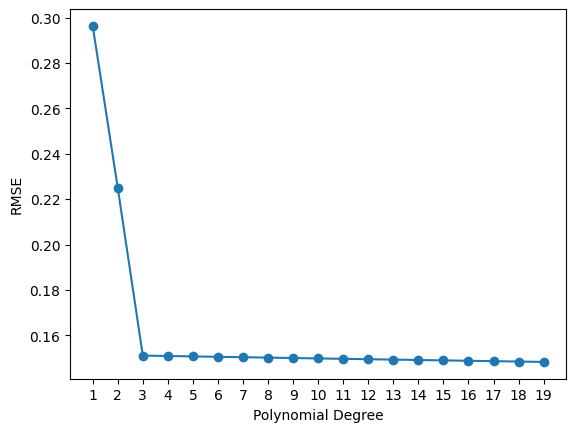

[[ 0.00000000e+00 -1.10772606e+04  5.49055450e+00 -9.07116281e-04]] [7449236.86970825]


In [11]:
errors = []
models = []
transforms = []
r = np.arange(1,20)
for d in r:
    poly = PolynomialFeatures(degree=d, include_bias=True)
    transforms.append(poly)
    X = poly.fit_transform(df[["Year"]], df["log_capacity"])
    reg = LinearRegression()
    reg.fit(X, df[["log_capacity"]].values)
    models.append(reg)
    rmse = root_mean_squared_error(df["log_capacity"],reg.predict(X))
    errors.append(rmse)


errors = np.array(errors)
differences = np.abs(np.diff(errors))
threshold = 0.001
best_index = np.argmax(differences[differences > 0] < threshold)
best_poly = transforms[best_index]
best_model = models[best_index]
print(f"Best degree: {best_index + 1} with RMSE {errors[best_index]}")

plt.plot(errors, marker="o")
plt.xticks(r - 1,labels=r)
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.show()

print(best_model.coef_, best_model.intercept_)

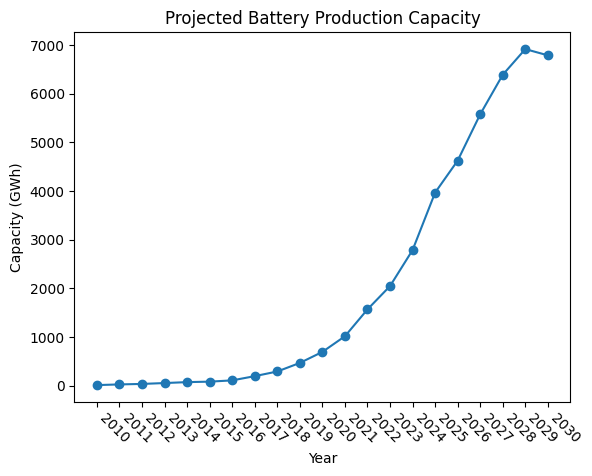

In [12]:
year_range = np.arange(df["Year"].min(), df["Year"].max())

p2 = pd.DataFrame(year_range[~np.isin(year_range, df["Year"])], columns=["Year"])
p2["log_capacity"] = best_model.predict(best_poly.transform(p2[["Year"]]))
p2["Capacity"] = np.exp(p2[["log_capacity"]])
df_full = pd.concat([df, p2], axis=0).sort_values("Year").reset_index(drop=True)
# df_full.to_excel(os.path.join(data_directory, "Capacity.xlsx"),  sheet_name="Projected Capacity", index=False)

ax = df_full.plot(x="Year", y="Capacity", marker="o")
ax.set_ylabel("Capacity (GWh)")
ax.set_xticks(df_full["Year"], df_full["Year"])
ax.tick_params(axis='x', rotation=-45)
for label in ax.get_xticklabels():
    label.set_ha('left')

plt.legend().remove()
plt.title("Projected Battery Production Capacity")
plt.show()

In [13]:
reserves_over_time = combined \
        .groupby(["Reserves & Resources As Of Date", "Primary Mineral"], as_index = False)["Primary Reserves and Resources"] \
        .agg("sum")


fig = px.line(reserves_over_time, x="Reserves & Resources As Of Date", facet_col = "Primary Mineral",
        y="Primary Reserves and Resources", log_y = True, facet_col_wrap=2, facet_row_spacing=0.2)

fig.update_xaxes(title_text="Date")
fig.update_layout(title = "Total Reserves Over the Years")
fig.update_yaxes(title_text=None)
fig.show()

In [14]:
D = combined[["Year","Primary Mineral", "Primary Reserves and Resources"]]

D = D.groupby(["Year","Primary Mineral"], as_index=False).agg("sum")


# Generate a complete set of Year-Mineral combinations
all_years = D["Year"].unique()
all_minerals = D["Primary Mineral"].unique()
complete_index = pd.MultiIndex.from_product([all_years, all_minerals], names=["Year", "Primary Mineral"])

# Reindex the DataFrame to include all combinations, filling missing values with 0
D = D.set_index(["Year", "Primary Mineral"]).reindex(complete_index, fill_value=0).reset_index()

D["Cumulative Reserves"] = D.groupby(["Primary Mineral"], as_index=False)["Primary Reserves and Resources"].agg("cumsum")



In [15]:
# Extend to Future Years
for yr in range(2025, 2030+1):
    latest = D[D["Year"]==2024]
    latest.loc[:,"Year"] = yr
    
    D = pd.concat([D, latest], axis=0)

    

In [15]:
# chem_comparisons = xw.Book("data/battery_chemistry_comparisons.xlsx", mode="i")
# mass = chem_comparisons.sheets[1]
# for i, v in df_full.iterrows():
#     mass.range(f"B2").value = v["Capacity"]
    
#     nmc_cols = mass.range("A6:A9")
#     nmc = mass.range("K5:N9").options(pd.DataFrame, index=False).value
#     nmc.index = nmc_cols.value
#     nmc_li_2 = mass.range("P6:S6").options(pd.DataFrame, header=False, index=False).value
#     nmc_li_2.index = ["Li+"]
#     nmc_li_2.columns = nmc.columns
#     nmc = pd.concat([nmc, nmc_li_2], axis=0)
    
#     nmc.columns = nmc.columns.str.replace("in ", "", regex=True)
#     nmc.insert(0, "Year", int(v["Year"]))
    
#     lib_cathode_cols = mass.range("A16:A28")
#     elem_cols2 = ["Li", "Co", "Mn",	"Ni", "Li+"]
#     lib_cathodes = mass.range("I16:N28").options(pd.DataFrame, transpose=True, 
#                                       header=False, index=False)
#     cathode_df = lib_cathodes.value
#     cathode_df.dropna(how='all', inplace=True)
#     cathode_df.columns = lib_cathode_cols.value
#     cathode_df.index = elem_cols2
#     full = nmc.join(cathode_df)
#     full.index.name ='Element'
    
#     full.reset_index(inplace=True)
#     if i == 0:
#         cathodes = full
#         continue
        
#     cathodes = pd.concat([cathodes, full], ignore_index=True)
        
        
# cathodes['+'] = cathodes['Element'] == "Li+"
# cathodes

# elem_map = {"Li": "Lithium", "Li+": "Lithium", "Co": "Cobalt", "Mn": "Manganese", "Ni": "Nickel"}
# cathodes.drop("Full Element Name", axis=1, inplace=True, errors="ignore")
# cathodes.insert(2, "Full Element Name",cathodes["Element"].map(elem_map))
# with pd.ExcelWriter(os.path.join(data_directory, "Capacity.xlsx"), mode='a', if_sheet_exists='replace') as writer:
#     cathodes.to_excel(writer, index=False, sheet_name="Demand by Cathode")
    
    

In [16]:

demand_by_cathode = pd.read_excel(os.path.join(data_directory, "Capacity.xlsx"), sheet_name="Demand by Cathode")
demand_by_cathode = demand_by_cathode[demand_by_cathode.Element != "O"]

demand_by_cathode = demand_by_cathode[~((demand_by_cathode.Element == "Li") & (demand_by_cathode["+"] == False))]
demand_by_cathode.drop(["Element", "+"], axis=1, inplace=True)

demand_by_cathode = demand_by_cathode.iloc[:,:-5] # Last 5 are redundant


In [17]:
demand_l = demand_by_cathode.melt(id_vars=["Year", "Full Element Name"], var_name="Cathode", value_name="demand").dropna()
demand_l[(demand_l["Year"] == 2011)]

,Year,Full Element Name,Cathode,demand
4,2011,Nickel,NMC622,9943.437896
5,2011,Manganese,NMC622,3102.428973
6,2011,Cobalt,NMC622,3328.032449
7,2011,Lithium,NMC622,2744.596608
88,2011,Nickel,NMC811,13257.917195
89,2011,Manganese,NMC811,1551.214486
90,2011,Cobalt,NMC811,1664.016224
91,2011,Lithium,NMC811,2747.442944
172,2011,Nickel,NMC532,8286.198247
173,2011,Manganese,NMC532,4653.643459


In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

F = make_subplots(rows=2, cols=2, x_title="Year", y_title="Reserves", subplot_titles=[mineral for mineral in D["Primary Mineral"].unique()])

# Define a fixed color mapping for cathode types

cathode_colors = {"NMC111": "blue", "NMC532": "green", "NMC622": "orange", "NMC811": "purple"}
mineral_colors =  ['#636efa','#EF553B', '#00cc96', '#ab63fa']

for i, mineral in enumerate(D["Primary Mineral"].unique()):
    M = D.loc[(D["Primary Mineral"] == mineral) & (D["Cumulative Reserves"] > 0)]
    S = demand_by_cathode[demand_by_cathode["Full Element Name"] == mineral]
    
    # Add the main mineral trace with its own legend group
    F.add_trace(
        go.Scatter(
            x=M["Year"], 
            y=M["Cumulative Reserves"], 
            mode="lines+markers",
            legendgroup=mineral,
            name=mineral,
            marker=dict(
                size=10,
                color=mineral_colors[i]
            ), 
            showlegend=True,
            legend="legend1"
        ),
        row=i // 2 + 1, 
        col=i % 2 + 1
    )
    
    # Add cathode traces grouped by cathode type
    for j,cathode in enumerate(S.columns[2:6]):
        F.add_trace(
            go.Scatter(
                x=S["Year"], 
                y=S[cathode], 
                mode="markers",
                legendgroup=cathode,  # Group by cathode type instead of mineral
                name=cathode,
                marker=dict(size=10,color=cathode_colors[cathode]),
                # Only show in legend for last mineral to avoid duplicates
                showlegend=(i == 0),
                legend="legend2",
            ),
            row=i // 2 + 1, 
            col=i % 2 + 1)
    
    # Add vertical line and annotation
    F.add_vline(x=2024, line_dash="dash", line_color="red")
    F.add_annotation(
        x=2024, 
        text="Current Year",
        showarrow=True,
        arrowhead=2,
        yshift=10,
        row=i // 2 + 1, 
        col=i % 2 + 1
    )

F.update_yaxes(type='log')
F.update_layout(title="Cumulative Growth in Reserves Over the Years",height=700,showlegend=True,
                legend1=dict(title=dict(text="Mineral")),
                legend2=dict(title=dict(text="NMC Cathodes"), y=0.1))
F.show()

In [19]:
F.write_html(file="NMC_over_time.html")

In [19]:

F = make_subplots(rows=2, cols=2, x_title="Year", y_title="Reserves", subplot_titles=[mineral for mineral in D["Primary Mineral"].unique()])

# Define a fixed color mapping for cathode types

# cathode_colors = {"NMC111": "blue", "NMC532": "green", "NMC622": "orange", "NMC811": "purple"}
mineral_colors =  ['#636efa','#EF553B', '#00cc96', '#ab63fa']

for i, mineral in enumerate(D["Primary Mineral"].unique()):
    M = D.loc[(D["Primary Mineral"] == mineral) & (D["Cumulative Reserves"] > 0)]
    S = demand_by_cathode[demand_by_cathode["Full Element Name"] == mineral]
    
    # Add the main mineral trace with its own legend group
    F.add_trace(
        go.Scatter(
            x=M["Year"], 
            y=M["Cumulative Reserves"], 
            mode="lines+markers",
            legendgroup=mineral,
            name=mineral,
            marker=dict(
                size=10,
                color=mineral_colors[i]
            ), 
            showlegend=True,
            legend="legend1"
        ),
        row=i // 2 + 1, 
        col=i % 2 + 1
    )
    
    # Add cathode traces grouped by cathode type
    for j,cathode in enumerate(S.columns[6:]):
        F.add_trace(
            go.Scatter(
                x=S["Year"], 
                y=S[cathode], 
                mode="markers",
                legendgroup=cathode,  # Group by cathode type instead of mineral
                name=cathode,
                marker=dict(size=10),
                # Only show in legend for last mineral to avoid duplicates
                showlegend=(i == 0),
                legend="legend2",
            ),
            row=i // 2 + 1, 
            col=i % 2 + 1)
    
    # Add vertical line and annotation
    F.add_vline(x=2024, line_dash="dash", line_color="red")
    F.add_annotation(
        x=2024, 
        text="Current Year",
        showarrow=True,
        arrowhead=2,
        yshift=10,
        row=i // 2 + 1, 
        col=i % 2 + 1
    )

F.update_yaxes(type='log')
F.update_layout(title="Cumulative Growth in Reserves Over the Years",height=700,showlegend=True,
                legend1=dict(title=dict(text="Mineral")),
                legend2=dict(title=dict(text="LIB Cathodes"), y=0.1))
F.show()

In [21]:
F.write_html(file="LIB_over_time.html")

In [109]:
from sklearn.cluster import KMeans
k = 7 # Number of clusters (adjust based on need)

C = combined.copy()

kmeans = KMeans(n_clusters=k, random_state=42).fit(C[["Latitude (degrees)", "Longitude (degrees)"]])
C['cluster'] = kmeans.labels_

fig = px.scatter_geo(C, lat="Latitude (degrees)", lon="Longitude (degrees)", color="Primary Mineral", 
                    size_max=40, hover_data=["Property ID","Primary Reserves and Resources", "Country/Region"],)

fig.update_layout(title="Map of Reserves",margin=dict(l=5, r=5, t=30, b=30))
fig.show()

In [110]:
fig.write_html(file="graphs/reserves_map.html")

In [25]:
usca = C[C["Primary Mineral"].isin(["Cobalt", "Nickel", "Manganese"]) & 
         C["Country/Region"].isin(["USA", "Canada"])]

In [92]:
usca_map = px.scatter_geo(usca, lat="Latitude (degrees)", lon="Longitude (degrees)", color="Primary Mineral", 
                    size_max=20, hover_data=["Property ID","Primary Reserves and Resources", "Country/Region"],
                    )

usca_map.update_layout(
    geo=dict(
        
        showland=True,
        landcolor="rgb(217, 217, 217)",
        lonaxis=dict(range=[usca["Longitude (degrees)"].min() - 10, usca["Longitude (degrees)"].max() + 10]),  # Adjust padding
        lataxis=dict(range=[usca["Latitude (degrees)"].min() - 10, usca["Latitude (degrees)"].max() + 10]),  # Adjust padding
    )
)

In [ ]:
import networkx as nx
from geopy.distance import geodesic
import numpy as np

G = nx.Graph()

# Add nodes
for _, row in usca.iterrows():
    G.add_node(row["Property ID"], primary_mineral=row["Primary Mineral"], name=row["Property"], 
               pos=(row["Latitude (degrees)"], row["Longitude (degrees)"]), 
               reserves=row["Primary Reserves and Resources"])

# Add weighted edges
for i, row1 in usca.iterrows():
    for j, row2 in usca.iterrows():
        if i < j:  # Avoid duplicate edges
            dist = geodesic((row1["Latitude (degrees)"], row1["Longitude (degrees)"]), 
                            (row2["Latitude (degrees)"], row2["Longitude (degrees)"])).km
            weight = dist / np.log(row1["Primary Reserves and Resources"])
         
            G.add_edge(row1["Property ID"], row2["Property ID"], weight=weight)

# Compute Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G, weight='weight')



In [107]:
import plotly.graph_objects as go
import networkx as nx

def plot_graph(graph):
    # Extract latitude and longitude from nodes
    latitudes = [graph.nodes[node]['pos'][0] for node in graph.nodes]
    longitudes = [graph.nodes[node]['pos'][1] for node in graph.nodes]

    # Get min/max bounds for zooming into relevant region
    lat_min, lat_max = min(latitudes), max(latitudes)
    lon_min, lon_max = min(longitudes), max(longitudes)

    # Create edge traces
    edge_traces = []
    for edge in graph.edges():
        edge_traces.append(go.Scattergeo(
            lon=[graph.nodes[edge[0]]['pos'][1], graph.nodes[edge[1]]['pos'][1], None],
            lat=[graph.nodes[edge[0]]['pos'][0], graph.nodes[edge[1]]['pos'][0], None],
            mode='lines',
            line=dict(width=1, color='gray'),
            hoverinfo='none',
            showlegend=False
        ))

    # Create node traces grouped by primary mineral
    unique_minerals = set(nx.get_node_attributes(graph, 'primary_mineral').values())
    node_traces = []
    
    for mineral in unique_minerals:
        nodes = [node for node in graph.nodes if graph.nodes[node]['primary_mineral'] == mineral]
        node_lat = [graph.nodes[node]['pos'][0] for node in nodes]
        node_lon = [graph.nodes[node]['pos'][1] for node in nodes]
        node_text = [f"{graph.nodes[node]['name']}<br>"
                     f"Primary Mineral: {mineral}<br>"
                     f"Reserves: {graph.nodes[node]['reserves']}<br>" 
                     f"Location: {graph.nodes[node]['pos']}" 
                     
                     
                     for node in nodes]

        node_traces.append(go.Scattergeo(
            lon=node_lon, lat=node_lat,
            mode='markers',
            marker=dict(size=8),
            name=mineral,
            text=node_text,
            hoverinfo='text'
        ))

    # Construct figure
    return go.Figure(
        data=edge_traces + node_traces,
        layout=go.Layout(
            title="NMC in USA and Canada",
            showlegend=True,
            margin=dict(l=5, r=5, t=30, b=30),
            geo=dict(
                projection_type="natural earth",
                
                showcoastlines=True,
                lonaxis=dict(range=[lon_min - 10, lon_max + 10]),  # Adjust padding
                lataxis=dict(range=[lat_min - 10, lat_max + 10]),  # Adjust padding
            )
        )
    )


In [108]:
plot_graph(mst)